# Linear regression
***
Linear regression is a ML method for predicting a numerical value given some input with the function $f:\Bbb{R}^n \to \Bbb{R}$. We aim to build an algorithm that can take a vector $\mathbf{x} \in \Bbb{R}^n$ as input and predict a value of a scalar such that $y \in \Bbb{R}$  as output.

let $\hat y$ be the value that our algorithm is trying to predict, we then can define the output to be,

$$\hat y= \mathbf{w}^T\mathbf{x}+b$$

Where $w$ is a vector of parameters. We can think of $w$ as weights of features that affects our prediction and $b$ is known as th the bias or intercept term.

The aim of this notebook is to look at the Linear regression algorithm without using the main ML library's to help give a better understanding of the algorithm.

# Representation
***
The loss function used is the hinge loss function defined as:

$$ l = \text{max}(0, 1-y^i(x^i-b))$$

That penalises loses linearly,that are further away from the regression line.
Where,

$$l = \left\{\begin{array}{l}0 & \text{ if }y\cdot(w \cdot x) \ge 1 \\ 1-y \cdot(w \cdot x) & \text{ otherwise } \end{array}\right.$$

The metric being used for our evaluation will be mean-sqaured error defined,
$$ \text{MSE} = \frac{1}{n}\text{SSE}=\frac{1}{n}\sum^n_{i=1}(\hat y_i - y_i)^2$$
where $n$ is the number entries in the dataset, $y$ is the ground truth or actual outcome and $\hat y$ is the prediction. We first get the differences between the ground truth and predicted value, square the differences, then sum them all up. This results in the sum of squared error (SSE), and then to attain the average we divide by the number predictions resulting in the scalar MSE value.

We will use gradient descent to update our weights this will be shown through **jacobian** matrix,

$$J(w, b) = \frac{1}{N}\sum^n_{i=1}(y_i-(wx_i+b))^2$$
$$J'(m, b) = \begin{bmatrix}\frac{df}{dw}\\ \frac{df}{db}\end{bmatrix} = \begin{bmatrix}\frac{1}{N}\sum-2x_i(y_i-(wx_i+b)) \\ \frac{1}{N}\sum-2(y_i-(wx_i+b))\end{bmatrix}$$

We use the update rule of:

$$w=w-\cdot dw$$
$$b=b-\cdot db$$

where,

$$\frac{dJ}{dw}= \frac{1}{N}\sum^n_{i=1} 2x_i(\hat y-y_i)$$
$$\frac{dJ}{db}= \frac{1}{N}\sum^n_{i=1} 2(\hat y-y_i)$$
Where the 2 can be omited because it is used just as a scaling factor.

Source: https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/linear_regression.py

### Import library's

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

from sklearn.model_selection import train_test_split

### Linear regression class

In [20]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

### Mean Squared Error (MSE) function


In [21]:
def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

## Boston house prices
The data set being used for our Linear regression algorithm will be the boston house prices.Lets have a look at the attributes/features included.
####  Attribute Information

Input features in order:<br>
1. CRIM: per capita crime rate by town<br>
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.<br>
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000 [$/10k]
11. PTRATIO: pupil-teacher ratio by town
12. B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population

##### Output variable:
1. MEDV: Median value of owner-occupied homes in $1000's [k$]


### Exploratory data analysis
One reason for using the boston house price dataset is that not alot of analysis is needed. So a quick look at the set to see if it will run.

In [22]:
# Load csv file 
df = pd.read_csv('../datasets/boston.csv', index_col=False)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


There are no null values

In [24]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


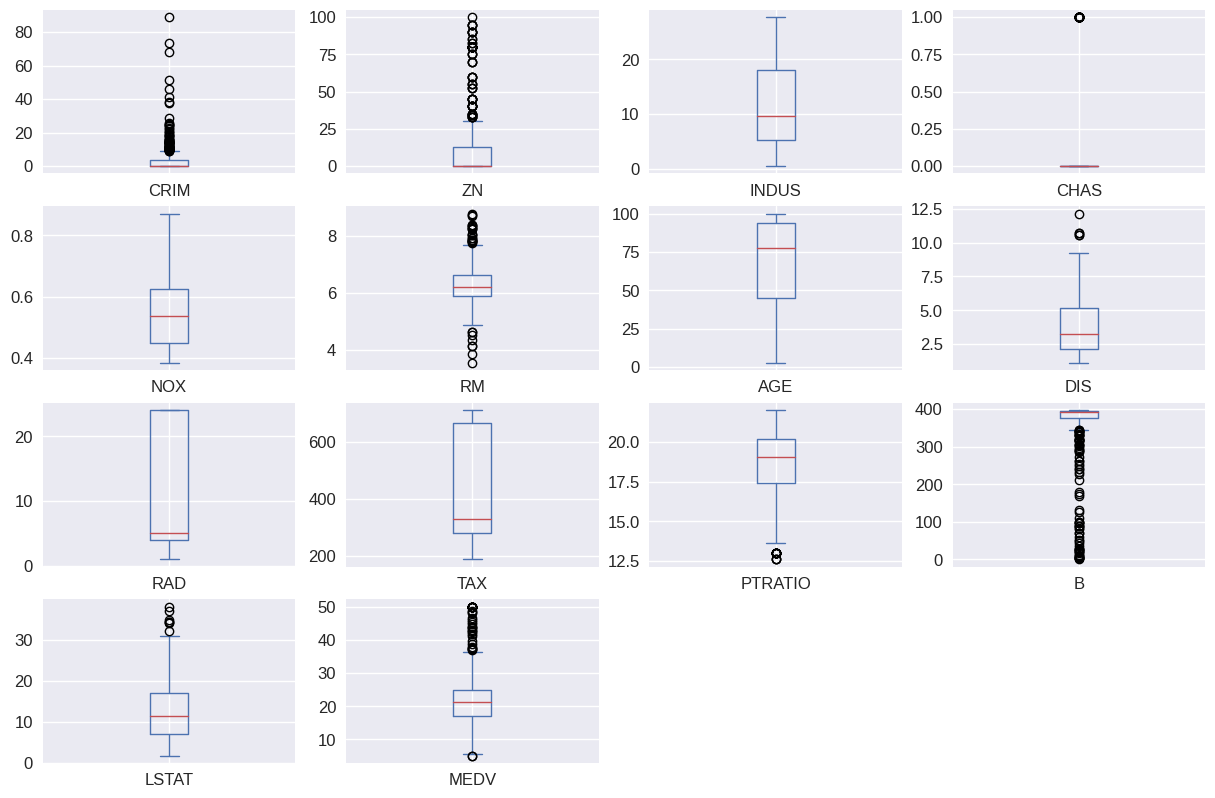

In [25]:
# Use box plot to check the value range and outliers of each feature
data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False, fontsize=12, figsize=(15,20));

There seem to be some outliers so the data will need to be normalised, which will be done before optimisation.

In [26]:
# assign numeriscal label to y
y = df['MEDV']
X = df.drop('MEDV', axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


<AxesSubplot:>

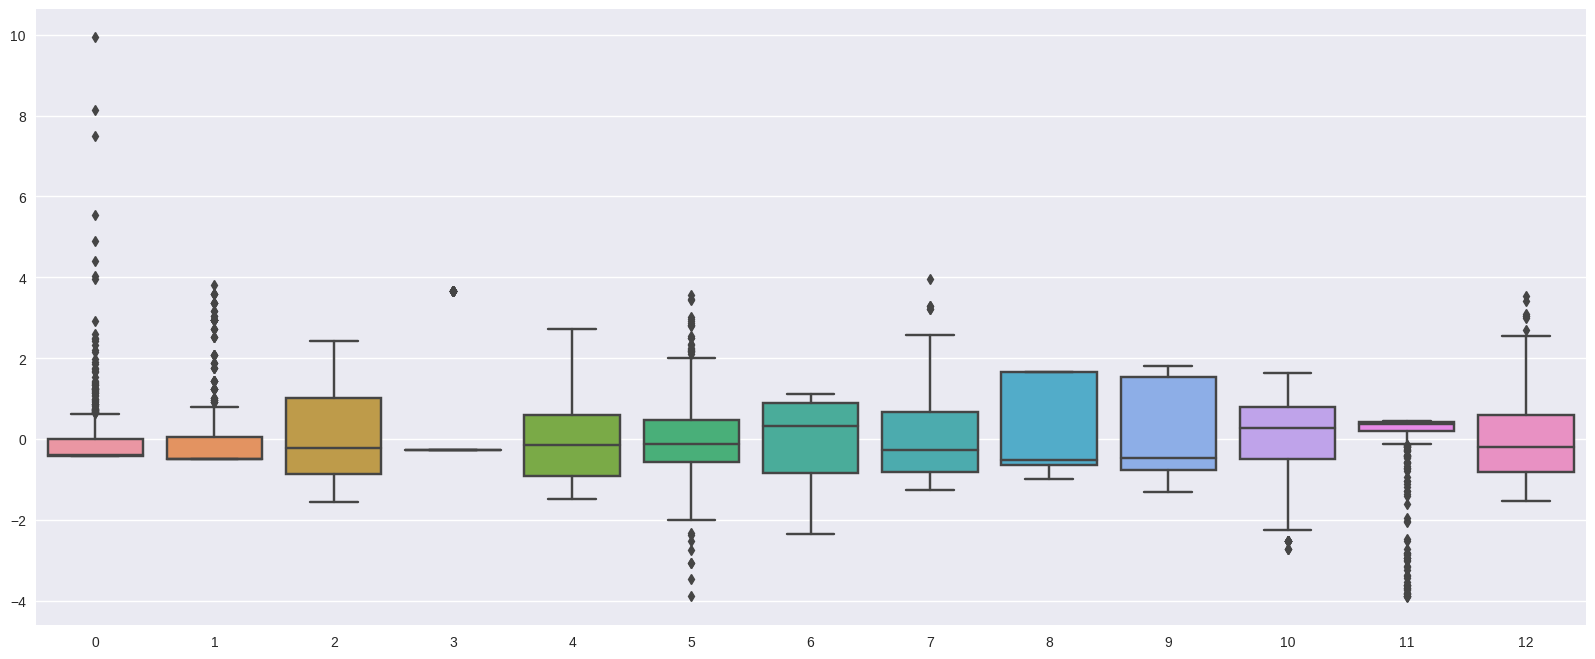

In [27]:
# Normalise the features to use zero mean normalisation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
fig, ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=X, ax=ax)

## Optimisation
***

We now split th data-set into training and a test set.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

To optimise our model we need a generalisation-error to fine-tune our hyperparameters. We will get this from a validation set, so we will split our training set again.

In [29]:
OX_train, OX_val, Oy_train, Oy_val = train_test_split(X_train, y_train, test_size=0.2, random_state=3)

The hyperparametrs to fine tune is just the learning rate. If we had more we would make a search grid comparing all possible combinations of hyperparameters.

In [30]:
learning_rates=[0.1,0.01,0.001,0.0001]

In [31]:
scores = []
for lr in learning_rates:
    linRegressor = LinearRegression(lr)
    linRegressor.fit(OX_train, Oy_train)
    predict = linRegressor.predict(OX_val)
    mse = mean_squared_error(Oy_val, predict)
    scores.append(mse)
    
scores

[28.576871832123945, 30.10985054999317, 123.72220360448173, 498.6276843798618]

The results show us that the learning rate 0.01 would be our best choice.

## Evaluation
***
Now we have hyperparamters choosen we can proceed with training with the maximimum amount of data before we test on unseen data.

In [32]:
model=LinearRegression(0.1)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, predict)
print("MSE:", mse)

MSE: 19.83144737959225


We end up with generalisation-error MSE of 19.8 tested on unseen data.

We can now compare are predicted vs ground truth values using a scatter plot.

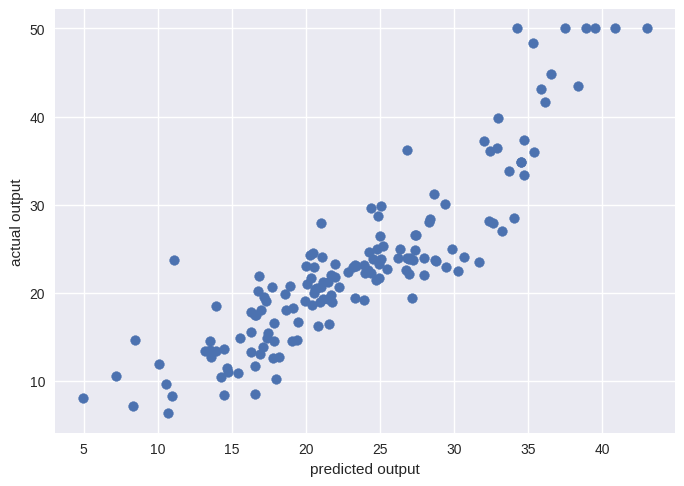

In [34]:
plt.scatter(predict, y_test)
plt.xlabel('predicted output')
plt.ylabel('actual output')
plt.show()

## Conclusion
***
Linear regression is known to be one of the easiest to understand ML algorithms, with powerful and efficient results espeically with the right kind of data.  